In [3]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Newton's method with numerical derivative

1) Write a function
```def newton(f, start, n):```
that try to find solution of $f(x)=0$ given starting point at $x = start$ for n iteration. But this time you don't need to supply $f'(x)$ by hands.

Try it on our usual suspect: solving $x = \cos(x)$

---

# Edge Detection

1) Read in Mario.png
```
im = plt.imread(filename)
plt.imshow(im)
```

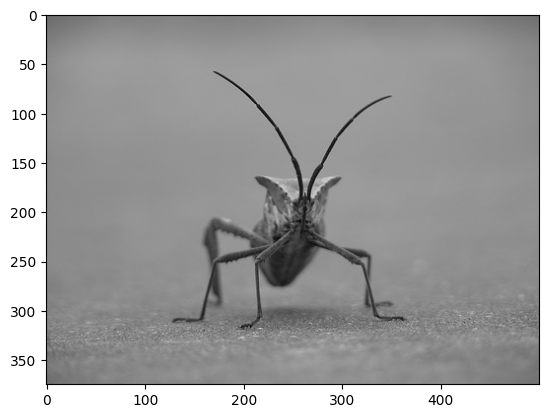

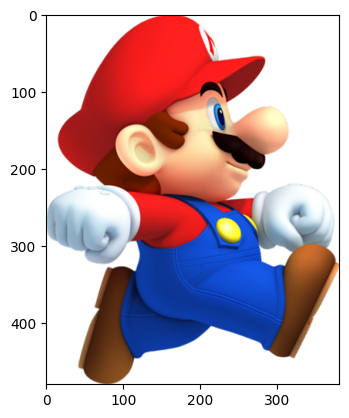

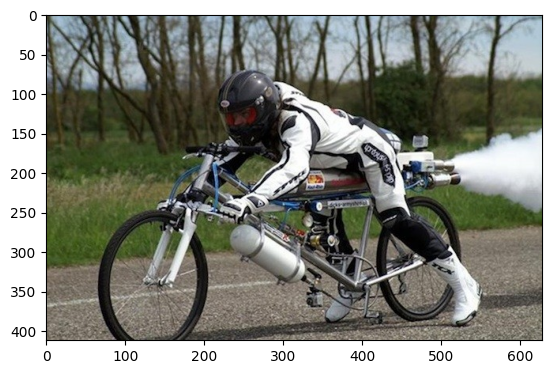

In [5]:
stinkbug = plt.imread('stinkbug.png')
mario = plt.imread('mario.png')
rocket = plt.imread('rocket-bicycle.png')
plt.imshow(stinkbug)
plt.figure()
plt.imshow(mario)
plt.figure()
plt.imshow(rocket)

2) The dimension of each output is the following: Can you guess what each dimension means?

or read this http://matplotlib.org/api/image_api.html

In [6]:
mario.shape

(480, 381, 4)

In [7]:
mario[100,100]

array([0.8784314 , 0.10588235, 0.10588235, 1.        ], dtype=float32)

3) Try to get a pixel on mario hat. It should be really close to red [1,0,0,1]. Note that the first dimesion is actually y not x.
```
    mario[y,x]
```

4) You can make a big blob in the image too
```
    mario [10:20,30:40] = np.array([0,1,0,1]) #green
```
this changes the image array where the first index is 10 to 20 and second index from 30 to 40 all to green. This is called chunk assignment. Quite convenient.

Try imshow after you edit. If you need to reset mario, do
```
mario = plt.imread('mario.png')
```


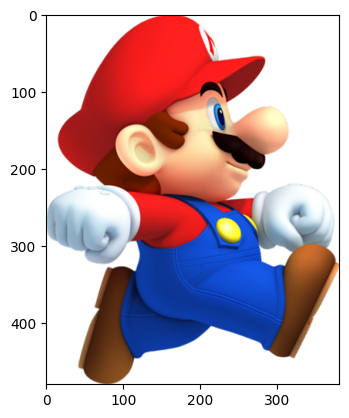

In [8]:
#mario [20:80, 150:200] = np.array([0,1,0,1])
plt.imshow(mario)

5) What defines an edge? What quantity distinguish the pixel in the middle of the hat and the pixel separating the hat and his ear?

In [9]:
ny, nx, nc = mario.shape #tuple expansion

def color_diff(iy, ix):
  north = np.sum(np.abs(mario[iy, ix] - mario[iy-1, ix]))
  south = np.sum(np.abs(mario[iy, ix] - mario[iy+1, ix]))
  west = np.sum(np.abs(mario[iy, ix] - mario[iy-1, ix-1]))
  east = np.sum(np.abs(mario[iy, ix] - mario[iy-1, ix+1]))
  return (north+south+west+east)/4.0

scores = np.zeros((ny,nx)) #create zero array with dimension ny*nx

for iy in range(1,ny-1):
  for ix in range(1,nx-1):
      scores[iy,ix] = color_diff(iy,ix)


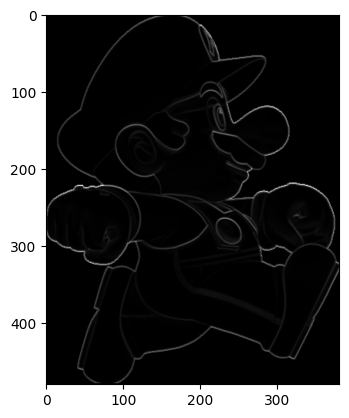

In [13]:
plt.imshow(scores, cmap='gray')

In [11]:
def gradient_magnitude_diff(iy, ix):
  """
  Calculates the edge strength using the magnitude of the color gradient.
  """
  # 1. Calculate the vertical gradient (Gy)
  # This is the difference between the pixel below and the pixel above.
  # A high value means a strong horizontal edge.
  gy = np.sum(np.abs(mario[iy+1, ix] - mario[iy-1, ix]))
  
  # 2. Calculate the horizontal gradient (Gx)
  # This is the difference between the pixel to the right and the pixel to the left.
  # A high value means a strong vertical edge.
  gx = np.sum(np.abs(mario[iy, ix+1] - mario[iy, ix-1]))
  
  # 3. Calculate the magnitude and return it
  # This combines the two gradients to find the total edge strength.
  magnitude = np.sqrt(gy**2 + gx**2)
  
  return magnitude

# Example of how you would loop through the image to create the edge map
# (Note the loop range avoids the 1-pixel border of the image)
y_max, x_max, nc = mario.shape
edge_map = np.zeros((y_max, x_max))

for iy in range(1, y_max - 1):
  for ix in range(1, x_max - 1):
    edge_map[iy, ix] = gradient_magnitude_diff(iy, ix)

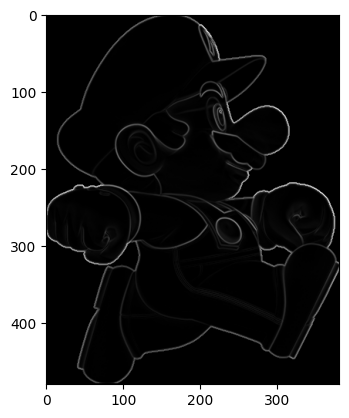

In [12]:
plt.imshow(edge_map, cmap='gray')